In [256]:
#loading local stored data (beter option with panada?)
import os #importing OperationSystem modul
import pandas as pd # importing pandas mdul as pd
import numpy as np
import matplotlib.pyplot as plt#matplotlib
import matplotlib.patches as mpatches

#seting the fonttypes to a format that is recognised as text in PDF and other programs e.g. Illustrator
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 12})#set font size to 12 globally
plt.rcParams['lines.linewidth'] = 0.5 #set line with to 1 globally
plt.rcParams['axes.linewidth'] = 2 # set the axis line with to 1 globally

In [257]:
#seting up the working directory to the choosen director (raw string input)
abs_path_log=r'C:\Users\Sebastian Schaller\Desktop\03_project\input_picture_selection'
os.chdir(abs_path_log)#seting working directory to the location of the mscl-log
os.getcwd()#geting the curent working directory, to check if working in the right directory

'C:\\Users\\Sebastian Schaller\\Desktop\\03_project\\input_picture_selection'

In [258]:
#loading and seting up the data
file_name1 = '5068_2_A_litho_log_input_simplified_cas.csv'

df_litholog_simplified = pd.read_csv(file_name1,
                                     header=0,
                                     names=['section_ID',
                                            'top (cm)',
                                            'bottom (cm)',
                                            'numerical code_simplified',
                                            'Lithotype Code',
                                            'intervall length [cm]',
                                            'data set']) 

Total_data_set = df_litholog_simplified.copy()
Used_data_set =  Total_data_set[Total_data_set['data set']>0].copy()
Training_data_set =  Total_data_set[Total_data_set['data set']== 1].copy()
Test_data_set =  Total_data_set[Total_data_set['data set']== 2].copy()
Validation_data_set =  Total_data_set[Total_data_set['data set']== 3].copy()

print(Total_data_set.info())
print(Used_data_set.info())
print(Training_data_set.info())
print(Test_data_set.info())
print(Validation_data_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531 entries, 0 to 530
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   section_ID                 531 non-null    object 
 1   top (cm)                   531 non-null    int64  
 2   bottom (cm)                531 non-null    float64
 3   numerical code_simplified  531 non-null    int64  
 4   Lithotype Code             531 non-null    object 
 5   intervall length [cm]      531 non-null    float64
 6   data set                   531 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 29.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 2 to 530
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   section_ID                 251 non-null    object 
 1   top (cm)                   251 non-null    int6

In [259]:
frquency_lithotype_total = np.unique(Total_data_set['Lithotype Code'],  return_counts= True )
frquency_lithotype_selected = np.unique(Used_data_set['Lithotype Code'],  return_counts= True )
frquency_lithotype_training = np.unique(Training_data_set['Lithotype Code'],  return_counts= True )
frquency_lithotype_test = np.unique(Test_data_set['Lithotype Code'],  return_counts= True )
frquency_lithotype_validation = np.unique(Validation_data_set['Lithotype Code'],  return_counts= True )

#used core sections
core_sections_total = np.unique(Total_data_set['section_ID'])
core_sections_selected  = np.unique(Used_data_set['section_ID'])
core_sections_training = np.unique(Training_data_set['section_ID'])
core_sections_test = np.unique(Test_data_set['section_ID'])
core_sections_validation = np.unique(Validation_data_set['section_ID'])

print(frquency_lithotype_total)
print(frquency_lithotype_selected)
print(frquency_lithotype_training)
print(frquency_lithotype_test)
print(frquency_lithotype_validation)

(array(['Dc', 'Dm', 'Fm', 'Gm', 'Sd', 'Sl', 'Sm'], dtype=object), array([ 25,  54,  51,  84,  44,  85, 188], dtype=int64))
(array(['Dc', 'Dm', 'Fm', 'Gm', 'Sd', 'Sl', 'Sm'], dtype=object), array([13, 22, 33, 34, 19, 52, 78], dtype=int64))
(array(['Dc', 'Dm', 'Fm', 'Gm', 'Sd', 'Sl', 'Sm'], dtype=object), array([ 7, 18, 25, 20, 14, 38, 53], dtype=int64))
(array(['Dc', 'Dm', 'Fm', 'Gm', 'Sd', 'Sl', 'Sm'], dtype=object), array([ 3,  2,  7,  7,  3,  7, 12], dtype=int64))
(array(['Dc', 'Dm', 'Fm', 'Gm', 'Sd', 'Sl', 'Sm'], dtype=object), array([ 3,  2,  1,  7,  2,  7, 13], dtype=int64))


In [260]:
np.savetxt('Selected_coresections_subdataset_mocule6.csv',core_sections_selected, delimiter=',', 
           fmt= "%s",header = 'core_id', comments='') 
np.savetxt('Selected_coresections_Training_mocule6.csv',core_sections_training, delimiter=',', 
           fmt= "%s",header = 'core_id', comments='') 
np.savetxt('Selected_coresections_test_mocule6.csv',core_sections_test, delimiter=',', 
           fmt= "%s",header = 'core_id', comments='') 
np.savetxt('Selected_coresections_validation_mocule6.csv',core_sections_validation, delimiter=',', 
           fmt= "%s",header = 'core_id', comments='') 

In [261]:
#calculating the distribution of the defined simplified lithology for the total drill core and the selected subsets for module 6
percentage_lito = np.zeros((np.shape(frquency_lithotype)[1]+1,10))
for i in range(len(percentage_lito)):
    if i == 0:
        percentage_lito[i,0] = np.sum(np.subtract(Total_data_set['bottom (cm)'],Total_data_set['top (cm)']))
        percentage_lito[i,1] = 100
        percentage_lito[i,2] = np.sum(np.subtract(Used_data_set['bottom (cm)'],Used_data_set['top (cm)']))
        percentage_lito[i,3] = 100
        percentage_lito[i,4] = np.sum(np.subtract(Training_data_set['bottom (cm)'],Training_data_set['top (cm)']))
        percentage_lito[i,5] = 100
        percentage_lito[i,6] = np.sum(np.subtract(Test_data_set['bottom (cm)'],Test_data_set['top (cm)']))
        percentage_lito[i,7] = 100
        percentage_lito[i,8] = np.sum(np.subtract(Validation_data_set['bottom (cm)'],Validation_data_set['top (cm)']))
        percentage_lito[i,9] = 100

        
    else:
        percentage_lito[i,0] = np.sum(np.where((Total_data_set['Lithotype Code']== frquency_lithotype_total[0][i-1]),
                                        np.subtract(Total_data_set['bottom (cm)'],Total_data_set['top (cm)']),0))        
        percentage_lito[i,1] = np.multiply(np.divide(percentage_lito[i,0],percentage_lito[0,0]),100)
        
        percentage_lito[i,2] = np.sum(np.where((Used_data_set['Lithotype Code']== frquency_lithotype_selected[0][i-1]),
                                        np.subtract(Used_data_set['bottom (cm)'],Used_data_set['top (cm)']),0))           
        percentage_lito[i,3] = np.multiply(np.divide(percentage_lito[i,2],percentage_lito[0,2]),100)
        
        percentage_lito[i,4] = np.sum(np.where((Training_data_set['Lithotype Code']== frquency_lithotype_training[0][i-1]),
                                        np.subtract(Training_data_set['bottom (cm)'],Training_data_set['top (cm)']),0))        
        percentage_lito[i,5] = np.multiply(np.divide(percentage_lito[i,4],percentage_lito[0,4]),100)
        
        percentage_lito[i,6] = np.sum(np.where((Test_data_set['Lithotype Code']== frquency_lithotype_test[0][i-1]),
                                        np.subtract(Test_data_set['bottom (cm)'],Test_data_set['top (cm)']),0))          
        percentage_lito[i,7] = np.multiply(np.divide(percentage_lito[i,6],percentage_lito[0,6]),100)
        
        percentage_lito[i,8] = np.sum(np.where((Validation_data_set['Lithotype Code']== frquency_lithotype_validation[0][i-1]),
                                        np.subtract(Validation_data_set['bottom (cm)'],Validation_data_set['top (cm)']),0))
        percentage_lito[i,9] = np.multiply(np.divide(percentage_lito[i,8],percentage_lito[0,8]),100)

percentage_lito = percentage_lito.round(2)

#converting to data frame
percentage_lito_df = pd.DataFrame(percentage_lito, 
                                  columns=['Total core length [cm]','[%]',
                                           'Core length selected [cm]','[%]',
                                           'Core length Training data set[cm]','[%]',
                                           'Core length test data set [cm]','[%]',
                                           'Core length validation data set [cm]','[%]'],
                                  index= ['Totoal','Dc', 'Dm', 'Fm', 'Gm', 'Sd', 'Sl', 'Sm'])
percentage_lito_df_sort = percentage_lito_df.sort_values(by=['Total core length [cm]'], ascending=False)

percentage_lito_df_sort.to_csv('Overview_lithodist_datasets_basa1_module6.csv',index = True)

display(percentage_lito_df_sort)

,Total core length [cm],[%],Core length selected [cm],[%],Core length Training data set[cm],[%],Core length test data set [cm],[%],Core length validation data set [cm],[%]
Totoal,25050.0,100.00,9645.0,100.00,7480.0,100.00,1059.5,100.00,1105.5,100.00
Sm,9959.5,39.76,3396.0,35.21,2729.5,36.49,315.5,29.78,351.0,31.75
Gm,6009.5,23.99,2010.0,20.84,1540.0,20.59,217.5,20.53,252.5,22.84
Sl,3271.0,13.06,1766.0,18.31,1352.0,18.07,230.0,21.71,184.0,16.64
Dm,2284.5,9.12,798.0,8.27,614.0,8.21,77.0,7.27,107.0,9.68
Sd,1677.5,6.70,687.5,7.13,495.5,6.62,100.0,9.44,92.0,8.32
Dc,1382.0,5.52,640.5,6.64,480.0,6.42,74.5,7.03,86.0,7.78
Fm,466.0,1.86,347.0,3.60,269.0,3.60,45.0,4.25,33.0,2.99


In [262]:
#defining colors and lebels for plot
colors = ['khaki','dodgerblue','palegoldenrod','gainsboro','lightcoral','gray','tab:green']#color list
# Setting the width of the bars 
bar_width = 0.18
# Calculating bar positions for both groups
bar_positions = np.arange(len(percentage_lito_df_sort.iloc[1:,].index))
text_labels = ['Total', 'Sub set','Training','Test','Val']
labels = list(percentage_lito_df_sort.iloc[1:,].index)

nr_corsection = [len(core_sections_total),len(core_sections_selected),len(core_sections_training),
                 len(core_sections_test),len(core_sections_validation)]
print(nr_corsection)

[278, 100, 77, 11, 12]


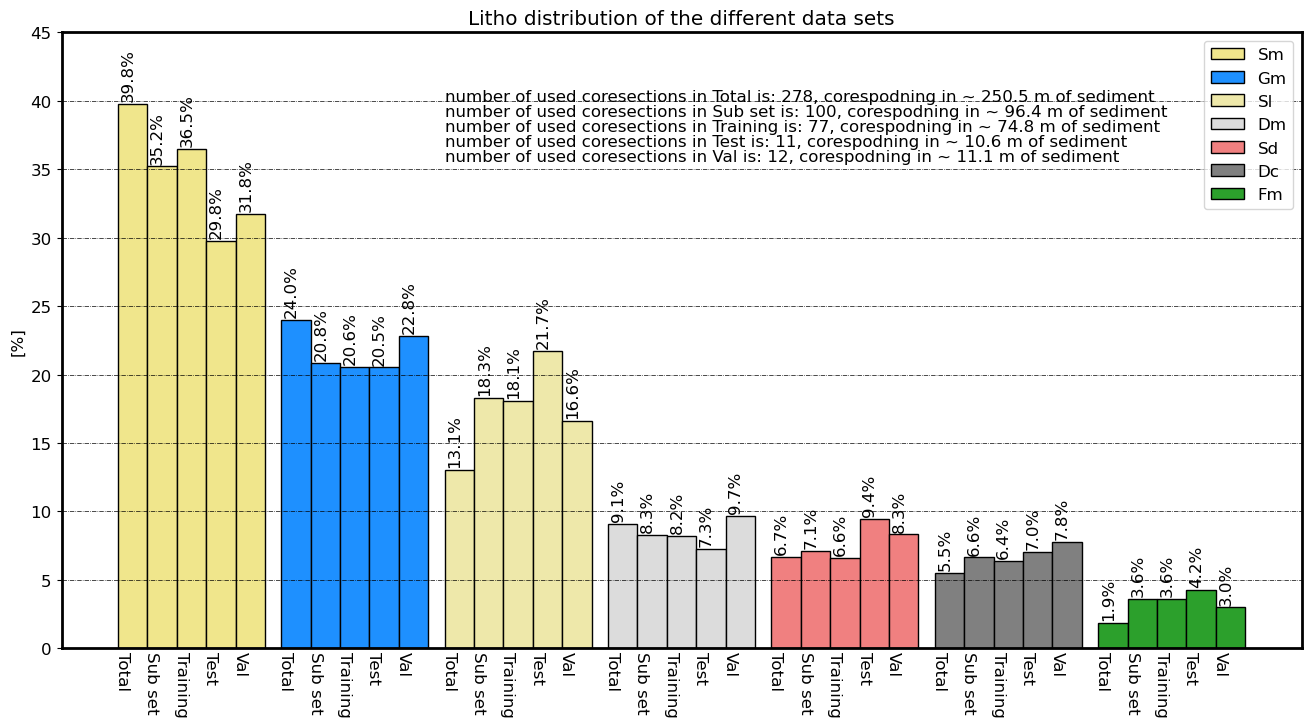

In [267]:
#seting up the supplots
fig1= plt.figure(figsize=(16,8))

#histogramm
for i in range(len(text_labels)):
    bar_position = bar_positions + bar_width*i

    plt.bar(bar_position,percentage_lito_df_sort.iloc[1:,(i*2+1)],width=bar_width,align = "edge", edgecolor='black',
            fill=True,color=colors, label=labels)
    plt.text(2,(40-i*1.1), 
             f'number of used coresections in {text_labels[i]} is: {nr_corsection[i]}'+
             f', corespodning in ~ {(percentage_lito_df_sort.iloc[0,(i*2)]/100).round(1)} m of sediment')
    
    for j in range(len(labels)):
        plt.text(bar_position[j],-0.2, text_labels[i], rotation = 270, rotation_mode = 'anchor')
        plt.text(bar_position[j]+0.09,percentage_lito_df_sort.iloc[j+1,(i*2+1)]+0.2,
                 str(percentage_lito_df_sort.iloc[j+1,(i*2+1)].round(1))+ '%',rotation = 90, rotation_mode = 'anchor')
    if i == 0:
        plt.legend()

plt.text(5,30,str())
plt.ylim(0,45)
plt.xticks([], [])    
plt.ylabel('[%]')
plt.title('Litho distribution of the different data sets')       
plt.grid(color='k', linestyle='-.', linewidth=0.5, axis='y')       

fig1.savefig('Lithodistribution_comparison_different_whole_dataset_with_subdatasets_basa1_module6.pdf')

In [268]:
training_data_norm = percentage_lito_df_sort.iloc[1:,4]/percentage_lito_df_sort.iloc[0,2]*100
test_data_norm = percentage_lito_df_sort.iloc[1:,6]/percentage_lito_df_sort.iloc[0,2]*100
validation_data_norm = percentage_lito_df_sort.iloc[1:,8]/percentage_lito_df_sort.iloc[0,2]*100

fsrting1 = f'Training set:{len(core_sections_training)} core sections; '
fsrting2 = f'Test set:{len(core_sections_test)} core sections; '
fsrting3 = f'Validation set:{len(core_sections_validation)} core sections'
titel1 = fsrting1 + fsrting2 + fsrting3

colors = ['khaki','dodgerblue','palegoldenrod','gainsboro','lightcoral','gray','tab:green']#color list
colors1 = ['gold','deepskyblue','lemonchiffon','silver','coral','darkgrey','forestgreen']#color list
colors2 = ['wheat','skyblue','papayawhip','lightgray','tomato','dimgray','yellowgreen']#color list
colors3 = ['yellow','steelblue','moccasin','lightsteelblue','salmon','slategrey','darkgreen']#color list

patchs0 = []
patchs1 = []
patchs2 = []
patchs3 = []

for i in range(len(colors)):
    patch0 = mpatches.Patch(facecolor=colors[i], edgecolor='black', 
                            label=f'{labels[i]}:{percentage_lito_df_sort.iloc[i+1,3].round(1)} %')
    patch1 = mpatches.Patch(facecolor=colors1[i], edgecolor='black', 
                            label=f'{labels[i]}:{training_data_norm[i].round(1)} %')
    patch2 = mpatches.Patch(facecolor=colors2[i], edgecolor='black',
                            label=f'{labels[i]}:{test_data_norm[i].round(1)} %')
    patch3 = mpatches.Patch(facecolor=colors3[i], edgecolor='black',
                            label=f'{labels[i]}:{validation_data_norm[i].round(1)} %')
    patchs0.append(patch0)
    patchs1.append(patch1)
    patchs2.append(patch2)
    patchs3.append(patch3)


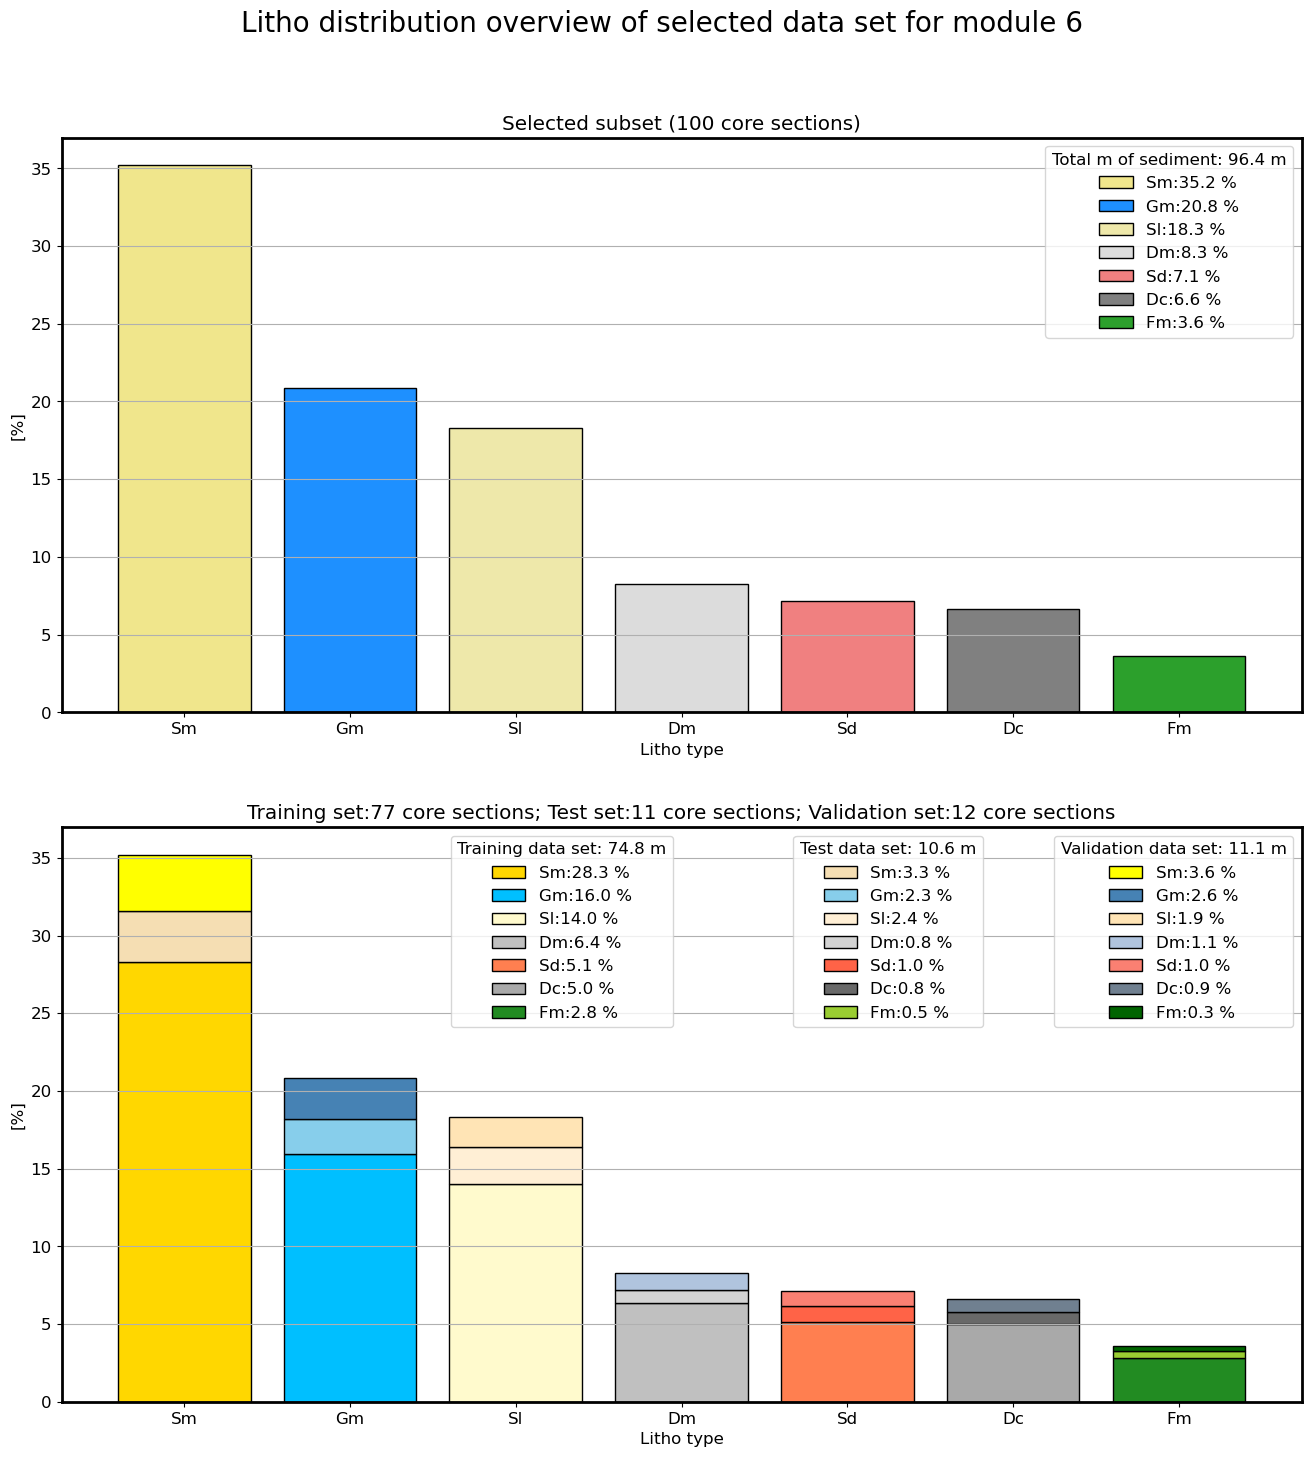

In [269]:
#seting up the supplots
fig2, ax = plt.subplots(2,1, figsize=(16,16))
fig2.suptitle('Litho distribution overview of selected data set for module 6',fontsize=20) 
#seting the position of the title
fig2.subplots_adjust(top=0.9)

#histogramm

ax[0].bar(labels,percentage_lito_df_sort.iloc[1:,3],fill=True,color=colors, edgecolor='black')
ax[0].set_title(f'Selected subset ({len(core_sections_selected)} core sections)')

ax[1].bar(labels,training_data_norm,
          fill=True,color=colors1,edgecolor='black', label='Training data set')

ax[1].bar(labels,test_data_norm, bottom= training_data_norm ,
          fill=True,color=colors2,edgecolor='black', label=labels)

ax[1].bar(labels,validation_data_norm, bottom= training_data_norm + test_data_norm ,
          fill=True,color=colors3,edgecolor='black', label=labels)

ax[1].set_title(titel1)

ax[0].grid( axis='y')
ax[1].grid( axis='y')


ax[0].set_xlabel('Litho type')#x-axis label
ax[1].set_xlabel('Litho type')#x-axis label


ax[0].legend(title=f'Total m of sediment: {(percentage_lito_df_sort.iloc[0,2]/100).round(1)} m',handles=patchs0)

legend1 = ax[1].legend(title=f'Training data set: {(percentage_lito_df_sort.iloc[0,4]/100).round(1)} m',
                       handles=patchs1, bbox_to_anchor=(0.5, 1) )
legend2 = ax[1].legend(title=f'Test data set: {(percentage_lito_df_sort.iloc[0,6]/100).round(1)} m',
                       handles=patchs2, bbox_to_anchor=(0.75, 1 ))
ax[1].legend(title=f'Validation data set: {(percentage_lito_df_sort.iloc[0,8]/100).round(1)} m',
             handles=patchs3, bbox_to_anchor=(1, 1))

ax[1].add_artist(legend1)
ax[1].add_artist(legend2)

#y-axis label
ax[0].set_ylabel('[%]')
ax[1].set_ylabel('[%]')

fig2.savefig('Lithodistribution_comparison_training_test_validation_dataset_basa1_module6.pdf')